In [2]:
import numpy as np
from scipy import integrate
from cmath import rect
import matplotlib.pyplot as plt

In [3]:
def awgn_channel_capacity(snr_db, x, p):
    snr = 10**(snr_db / 10)

    def pdf_channel_output(y1, y2, snr, x, p):
        res = 0.0
        for xk, pk in zip(x, p):
            uk = (y1 - np.sqrt(snr) * np.real(xk))**2 + (y2 - np.sqrt(snr) * np.imag(xk))**2
            res += pk / np.pi * np.exp(-uk)

        return res

    def integrand(snr, x, p):
        return lambda y1, y2: pdf_channel_output(y1, y2, snr, x, p) * np.log2(pdf_channel_output(y1, y2, snr, x, p))


    R = np.max(np.abs(np.sqrt(snr) * x)) + 5
    h = lambda x: np.sqrt(R**2 - x**2)
    g = lambda x: -np.sqrt(R**2 - x**2)


    integral, abserr = integrate.dblquad(integrand(snr, x, p), -R, R, g, h, epsabs=1e-5, epsrel=1e-5)
    capacity = -np.log2(np.pi * np.e) - integral
    return capacity, abserr

In [4]:
probs = np.full(16, 1/16)
def mean_energy(x, p=probs):
    return np.dot(np.abs(x)**2, p)

In [5]:
qam_16 = []
aqam_16 = []

a = 1.0 / np.sqrt(10.)
b = 1.0 / np.sqrt(11.5)

for i in range(4):
        for j in range(4):
            point = (-3. + 2 * i) + (-3. + 2 * j) * 1j
            qam_16.append(a * point)

            rho = np.sqrt(2. + 6 * i) if i else 2.
            theta = (i % 2) * np.pi / 4 + j * np.pi / 2
            aqam_16.append(b * rect(rho, theta))

qam_16 = np.array(qam_16)
aqam_16 = np.array(aqam_16)

In [6]:
snr_db_values = np.arange(-1., 20.1, 0.5)
res_qam = [awgn_channel_capacity(snr_db, qam_16, probs) for snr_db in snr_db_values]
res_aqam = [awgn_channel_capacity(snr_db, aqam_16, probs) for snr_db in snr_db_values]

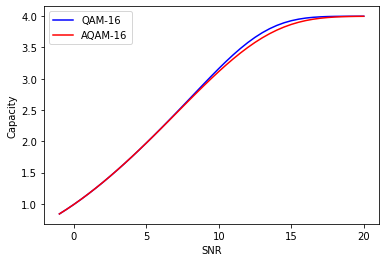

In [7]:
y1 = np.array([val for val, _ in res_qam])
y2 = np.array([val for val, _ in res_aqam])

plt.plot(snr_db_values, y1, "-b", label="QAM-16")
plt.plot(snr_db_values, y2, "-r", label="AQAM-16")
plt.legend(loc="upper left")
plt.xlabel('SNR')
plt.ylabel('Capacity')
# plt.savefig('capacity_plot.png')
plt.show()